# 13과 [예제] pandas with matplotlib

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 보스톤 시, 타운별 집값  
③ 아이리스 꽃 분류


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston2_NA.csv')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.0


In [4]:
# 아이리스 꽃 분류
iris = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# air
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/airquality_simple.csv')
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5


## 2.pandas with matplotlib

* 기본문법
    * 단변량 차트 : Series.plot(kind = '  ' )
    * 이변량 차트 : Dataframe.plot(kind = '  ', x= , y= )
* 추가
    * pandas.plot.그래프
    * padas.그래프

### 1) 히스토그램

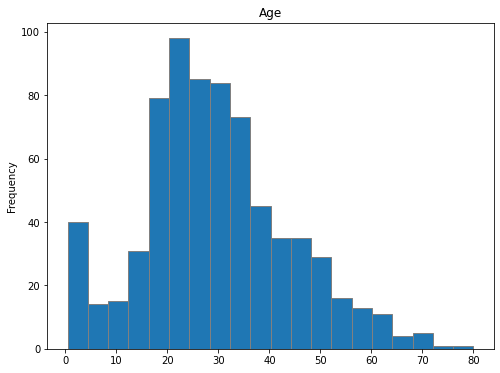

In [6]:
titanic['Age'].plot(kind = 'hist', bins = 20
                    , edgecolor = 'grey', figsize = (8,6), title = 'Age')
plt.show()

### 2) Density plot

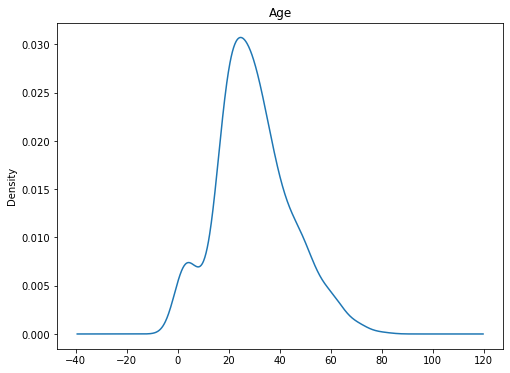

In [7]:
titanic['Age'].plot(kind = 'kde'
                    , figsize = (8,6), title = 'Age')
plt.show()

### 3) Boxplot

In [9]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

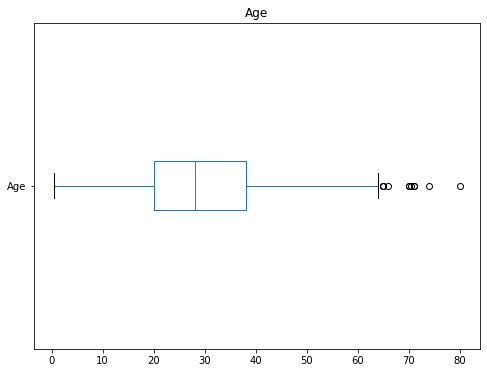

In [8]:
titanic['Age'].plot(kind = 'box', vert = False
                    , figsize = (8,6), title = 'Age')
plt.show()

### 4) scatter

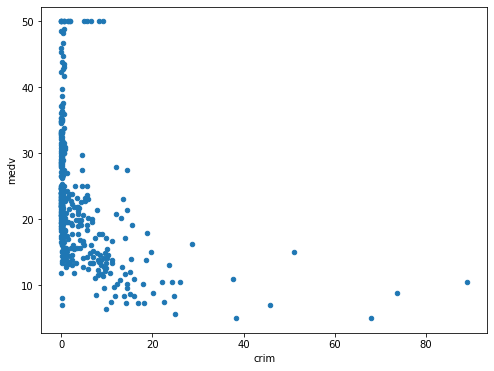

In [10]:
boston.plot(kind = 'scatter', x = 'crim', y = 'medv', figsize = (8,6))
plt.show()

### 5) 추가로...

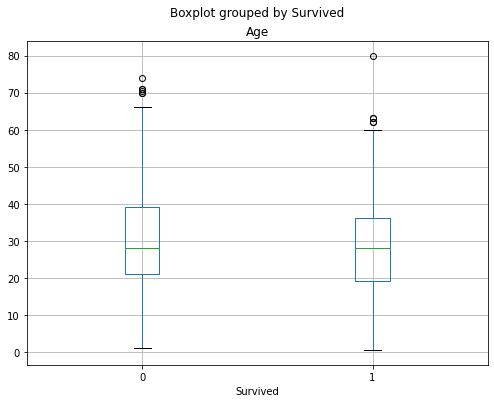

In [11]:
titanic.boxplot('Age', by = 'Survived', figsize = (8,6))
plt.show()

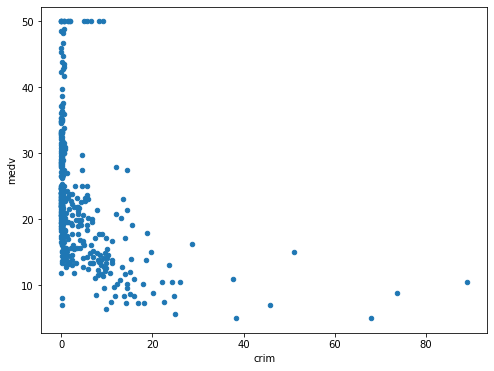

In [12]:
boston.plot.scatter(x = 'crim', y = 'medv', figsize = (8,6))
plt.show()

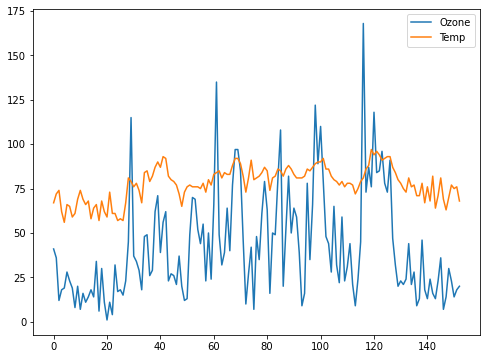

In [13]:
air.loc[:,['Ozone','Temp']].plot(figsize = (8,6))
plt.show()

## 3.NaN 시각화



### 1) 시각화

아래 두 코드는 동일한 결과를 줍니다. 모두 칼럼별 NaN을 count 해줍니다.
* df.isnull().sum()
* df.isna().sum()


In [14]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

heatmap을 이용하여 NaN을 쉽게 시각화 할 수 있습니다.
* df.isnull() --> NaN 이면 1, 아니면 0 입니다.

In [16]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


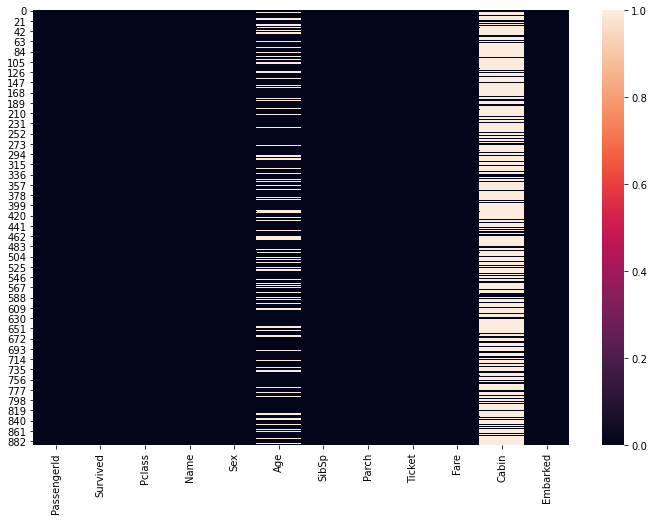

In [17]:
plt.figure(figsize = (12,8))
sns.heatmap(titanic.isnull())
plt.show()

* 실습

In [18]:
# 아래 데이터에 대해서 NaN은 시각화 합시다.
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_NA.csv"

data = pd.read_csv(path)
data.head()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,AppartmentType,NoCredits,Occupation,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28.0,2,1,3,1,1
1,1,2,9,2,0,276,3,4,4,1,22.0,1,1,2,1,1
2,1,1,18,4,2,1049,2,2,4,2,21.0,1,1,3,1,1
3,1,1,24,4,1,6419,5,2,4,4,NaN,3,2,4,2,1
4,1,3,12,2,2,1424,5,2,4,1,55.0,2,1,4,2,1


In [20]:
data.isnull().sum()

Creditability      0
AccountBalance     0
CreditDuration     0
Payment            0
Purpose            0
CreditAmount       0
Employment         0
SexMarital         0
CurrentAddress     0
MostValuable       0
Age               17
AppartmentType     0
NoCredits          0
Occupation         0
Telephone          0
ForeignWorker      0
dtype: int64

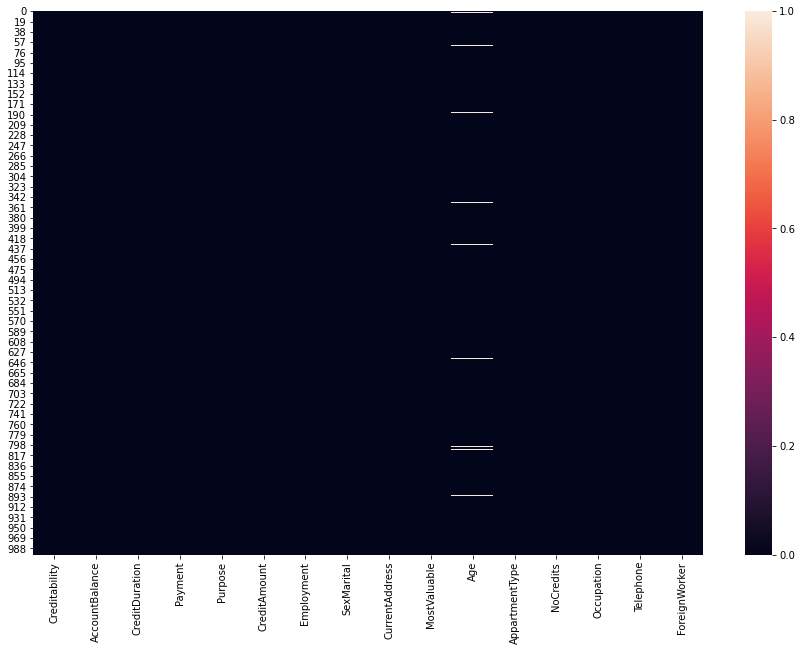

In [24]:
plt.figure(figsize = (15,10))
sns.heatmap(data.isna())
plt.show()

### 2) 조치

#### ① 삭제

In [28]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
titanic.shape

(891, 12)

In [26]:
# 열 삭제
titanic2 = titanic.copy()
titanic2.dropna(axis=1, inplace=True)
titanic2.shape

(891, 9)

In [27]:
# 행 삭제
titanic2 = titanic.copy()
titanic2.dropna(axis=0, inplace=True)
titanic2.shape

(183, 12)

#### ② 채우기

* 단일값 : simpleImputer(참조)

아래 코드는 참조만 하세요~!!

In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

titanic2 = titanic.loc[:,['Age']]
print(titanic2.isna().sum())

titanic2 = imputer.fit_transform(titanic2)

titanic2 = pd.DataFrame(titanic2, columns = ['Age'])
print(titanic2.isna().sum())

Age    177
dtype: int64
Age    0
dtype: int64


* 이전, 이후, 보간법 (시계열데이터에서만 적용 가능)
    * 이전값으로 채우기 : .fillna(method = 'ffill')
    * 이후값으로 채우기 : .fillna(method = 'bfill')
    * 앞뒤 값으로 채우기 : .interpolate(method = 'linear')

In [30]:
air.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [31]:
air.head(7)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5
5,28,NaN,14.9,66,5,6
6,23,299.0,8.6,65,5,7


In [32]:
# 이전값으로 채우기 : .fillna(method = 'ffill') forward fill
air2 = air.copy()
air2 = air.fillna(method = 'ffill')
air2.head(7)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,313.0,14.3,56,5,5
5,28,313.0,14.9,66,5,6
6,23,299.0,8.6,65,5,7


* 실습

In [33]:
# Solar.R에 대해서 이후값으로 채우기 : .fillna(method = 'bfill')
air2 = air.copy()
air2 = air.fillna(method = 'bfill')
air2.head(7)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,299.0,14.3,56,5,5
5,28,299.0,14.9,66,5,6
6,23,299.0,8.6,65,5,7


In [35]:
# 앞뒤 값으로 채우기 : .interpolate(method = 'linear')
air2 = air.copy()
air2 = air.interpolate(method = 'linear')
air2.head(7)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.000000,7.4,67,5,1
1,36,118.000000,8.0,72,5,2
2,12,149.000000,12.6,74,5,3
3,18,313.000000,11.5,62,5,4
4,19,308.333333,14.3,56,5,5
5,28,303.666667,14.9,66,5,6
6,23,299.000000,8.6,65,5,7
